# 4. Examples of flat files
.csv, .txt

# 5. What exactly are flat files
Text files containing data

Record: row of fields or attrigutes
* Flat files consist of rows and each row is called a record.
* A record in a flat file is composed of fields or attributes, each of which contains at most one item of information.
* Flat files are pervasive in data science.

# 6. Why we like flat files and the Zen of Python
In PythonLand, there are currently hundreds of Python Enhancement Proposals, commonly referred to as PEPs. PEP8, for example, is a standard style guide for Python, written by our sensei Guido van Rossum himself. It is the basis for how we here at DataCamp ask our instructors to style their code. Another one of my favorites is PEP20, commonly called the Zen of Python. Its abstract is as follows:

#### _Long time Pythoneer Tim Peters succinctly channels the BDFL's guiding principles for Python's design into 20 aphorisms, only 19 of which have been written down._

If you don't know what the acronym BDFL stands for, I suggest that you look [**here**](https://docs.python.org/3.3/glossary.html#term-bdfl). You can print the Zen of Python in your shell by typing **import this** into it! You're going to do this now and the 5th aphorism (line) will say something of particular interest.

The question you need to answer is: what is the 5th aphorism of the Zen of Python?

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# 7. Using NumPy to import flat files
In this exercise, you're now going to load the MNIST digit recognition dataset using the numpy function **loadtxt()** and see just how easy it can be:

* The first argument will be the filename.
* The second will be the delimiter which, in this case, is a comma.

You can find more information about the MNIST dataset [**here**](http://yann.lecun.com/exdb/mnist/) on the webpage of Yann LeCun, who is currently Director of AI Research at Facebook and Founding Director of the NYU Center for Data Science, among many other things.

### Instructions
* Fill in the arguments of np.loadtxt() by passing file and a comma ',' for the delimiter.
* Fill in the argument of print() to print the type of the object digits. Use the function type().
* Execute the rest of the code to visualize one of the rows of the data.

<class 'numpy.ndarray'>


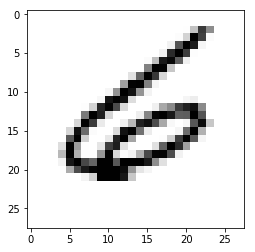

In [3]:
# Import package
import numpy as np
import matplotlib.pyplot as plt

# Assign filename to variable: file
# file = 'digits.csv' # DON'T HAVE THIS FILE
file = 'mnist_kaggle_some_rows.csv'
# looks like my file is the same as digits, just named differently.

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

# 8. Customizing your NumPy import
What if there are rows, such as a header, that you don't want to import? What if your file has a delimiter other than a comma? What if you only wish to import particular columns?

There are a number of arguments that np.loadtxt() takes that you'll find useful:

* delimiter changes the delimiter that loadtxt() is expecting.
  * You can use ',' for comma-delimited.
  * You can use '\t' for tab-delimited.
* **skiprows** allows you to specify how many rows (not indices) you wish to skip
* **usecols** takes a list of the indices of the columns you wish to keep.

The file that you'll be importing, digits_header.txt, has a header and is tab-delimited.

### Instructions
* Complete the arguments of np.loadtxt(): the file you're importing is tab-delimited, you want to skip the first row and you only want to import the first and third columns.
* Complete the argument of the print() call in order to print the entire array that you just imported.

#Not going to run this, because don't have the file

    import numpy as np
    file = 'digits_header.txt'
    data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0, 2])
    print(data)

# 9. Importing different datatypes  
The file seaslug.txt

* has a text header, consisting of strings
* is tab-delimited.

These data consists of percentage of sea slug larvae that had metamorphosed in a given time period. Read more [**here**](http://www.stat.ucla.edu/~rgould/datasets/aboutseaslugs.html).

Due to the header, if you tried to import it as-is using np.loadtxt(), Python would throw you a ValueError and tell you that it could not convert string to float. There are two ways to deal with this: firstly, you can set the data type argument dtype equal to str (for string).

Alternatively, you can skip the first row as we have seen before, using the skiprows argument.

### Instructions
* Complete the first call to np.loadtxt() by passing file as the first argument.
* Execute print(data[0]) to print the first element of data.
* Complete the second call to np.loadtxt(). The file you're importing is tab-delimited, the datatype is float, and you want to skip the first row.
* Print the 10th element of data_float by completing the print() command. Be guided by the previous print() call.
* Execute the rest of the code to visualize the data.

['Time' 'Percent']
[ 0.     0.357]


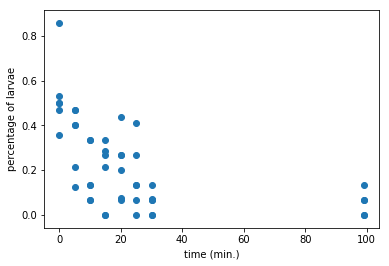

In [5]:
# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

# 10. Working with mixed datatypes (1)
Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function np.loadtxt() will freak at this. There is another function, np.genfromtxt(), which can handle such structures. If we pass dtype=None to it, it will figure out what types each column should be.

Import 'titanic.csv' using the function np.genfromtxt() as follows:

    data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)

Here, the first argument is the filename, the second specifies the delimiter , and the third argument names tells us there is a header. Because the data are of different types, data is an object called a [**structured array**](https://docs.scipy.org/doc/numpy/user/basics.rec.html). Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing np.shape(data).

Accessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute data[i] and to get the column with name 'Fare', execute data['Fare'].

After importing the Titanic data as a structured array (as per the instructions above), print the entire column with the name Survived to the shell. What are the last 4 values of this column?

In [7]:
data = np.genfromtxt('titanic_sub.csv', delimiter=',', names=True, dtype=None)

In [9]:
np.shape(data)

(891,)

In [10]:
data[0] # first row

(1, 0, 3, b'male',  22., 1, 0, b'A/5 21171',  7.25, b'', b'S')

In [11]:
data[1] # second row

(2, 1, 1, b'female',  38., 1, 0, b'PC 17599',  71.2833, b'C85', b'C')

In [14]:
data['Survived'] # column "Survived", last 4 values are 1 0 1 0

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

# 11. Working with mixed datatypes (2)
You have just used np.genfromtxt() to import data containing mixed datatypes. There is also another function **np.recfromcsv()** that behaves similarly to np.genfromtxt(), except that its default dtype is None. In this exercise, you'll practice using this to achieve the same result.

### Instructions
* Import titanic.csv using the function **np.recfromcsv()** and assign it to the variable, d. **You'll only need to pass file to it because it has the defaults delimiter=',' and names=True in addition to dtype=None!**
* Run the remaining code to print the first three entries of the resulting array d.

In [15]:
# Assign the filename: file
file2 = 'titanic_sub.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file2)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male',  22., 1, 0, b'A/5 21171',   7.25  , b'', b'S')
 (2, 1, 1, b'female',  38., 1, 0, b'PC 17599',  71.2833, b'C85', b'C')
 (3, 1, 3, b'female',  26., 0, 0, b'STON/O2. 3101282',   7.925 , b'', b'S')]
